In [ ]:
!pip install scikit-learn==1.2.2


# Feature engineering

In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load data
df = pd.read_excel('cleaned_data.xlsx')

# Feature extraction functions (as provided)
def count_words(text):
    return len(text.split()) if pd.notnull(text) else 0

def count_characters(text):
    return len(text) if pd.notnull(text) else 0

def avg_word_length(text):
    words = text.split() if pd.notnull(text) else []
    return sum(len(word) for word in words) / len(words) if words else 0

def count_sentences(text):
    return len(re.split(r'[.!?]', text)) - 1 if pd.notnull(text) else 0

def count_uppercase_ratio(text):
    return sum(1 for char in text if char.isupper()) / len(text) if pd.notnull(text) and len(text) > 0 else 0

def keyword_count(text, keywords):
    words = text.split() if pd.notnull(text) else []
    return sum(1 for word in words if word.lower() in keywords)

def unique_word_ratio(text):
    words = text.split() if pd.notnull(text) else []
    return len(set(words)) / len(words) if words else 0

def check_role_in_resume(resume, role):
    return 1 if pd.notnull(resume) and role.lower() in resume.lower() else 0

def keyword_overlap(text1, text2):
    if pd.notnull(text1) and pd.notnull(text2):
        words1 = set(text1.split())
        words2 = set(text2.split())
        return len(words1 & words2)
    return 0

# Predefined keyword dictionaries
technical_keywords = {'python', 'java', 'sql', 'machine learning', 'cloud', 'design', 'analysis', 'management'}
positive_keywords = {'excellent', 'success', 'outstanding', 'achievement', 'skilled'}
negative_keywords = {'poor', 'inadequate', 'lacking', 'failure', 'weak'}

# Feature engineering (as before)
df['resume_word_count'] = df['Cleaned_Resume'].apply(count_words)
df['resume_char_count'] = df['Cleaned_Resume'].apply(count_characters)
df['resume_avg_word_length'] = df['Cleaned_Resume'].apply(avg_word_length)
df['resume_sentence_count'] = df['Cleaned_Resume'].apply(count_sentences)
df['resume_uppercase_ratio'] = df['Cleaned_Resume'].apply(count_uppercase_ratio)
df['resume_technical_keyword_count'] = df['Cleaned_Resume'].apply(lambda x: keyword_count(x, technical_keywords))
df['resume_positive_keyword_count'] = df['Cleaned_Resume'].apply(lambda x: keyword_count(x, positive_keywords))
df['resume_negative_keyword_count'] = df['Cleaned_Resume'].apply(lambda x: keyword_count(x, negative_keywords))
df['resume_unique_word_ratio'] = df['Cleaned_Resume'].apply(unique_word_ratio)

df['transcript_word_count'] = df['Cleaned_Transcript'].apply(count_words)
df['transcript_char_count'] = df['Cleaned_Transcript'].apply(count_characters)
df['transcript_avg_word_length'] = df['Cleaned_Transcript'].apply(avg_word_length)
df['transcript_sentence_count'] = df['Cleaned_Transcript'].apply(count_sentences)
df['transcript_uppercase_ratio'] = df['Cleaned_Transcript'].apply(count_uppercase_ratio)
df['transcript_positive_keyword_count'] = df['Cleaned_Transcript'].apply(lambda x: keyword_count(x, positive_keywords))
df['transcript_negative_keyword_count'] = df['Cleaned_Transcript'].apply(lambda x: keyword_count(x, negative_keywords))
df['transcript_unique_word_ratio'] = df['Cleaned_Transcript'].apply(unique_word_ratio)

df['job_role_in_resume'] = df.apply(lambda row: check_role_in_resume(row['Cleaned_Resume'], row['Role']), axis=1)

df['resume_job_keyword_overlap'] = df.apply(lambda row: keyword_overlap(row['Cleaned_Resume'], row['Cleaned_Job_Description']), axis=1)
df['transcript_job_keyword_overlap'] = df.apply(lambda row: keyword_overlap(row['Cleaned_Transcript'], row['Cleaned_Job_Description']), axis=1)

# Role popularity (frequency encoding)
role_counts = df['Role'].value_counts()
df['role_popularity'] = df['Role'].map(role_counts)

# Decision reason encoding
df['decision_reason_encoded'] = df['Reason for decision'].astype('category').cat.codes

# TF-IDF and cosine similarity
tfidf_vectorizer = TfidfVectorizer()

# Concatenating all text columns for TF-IDF
df['All_Text'] = df['Cleaned_Resume'] + ' ' + df['Cleaned_Transcript'] + ' ' + df['Cleaned_Job_Description']

# Fitting and transforming the text columns
tfidf_matrix = tfidf_vectorizer.fit_transform(df['All_Text'])

# Cosine similarities
df['resume_job_similarity'] = [
    cosine_similarity(tfidf_matrix[i, :].reshape(1, -1), tfidf_matrix[j, :].reshape(1, -1))[0, 0]
    for i, j in zip(df.index, df.index)
]

df['transcript_job_similarity'] = [
    cosine_similarity(tfidf_matrix[i, :].reshape(1, -1), tfidf_matrix[k, :].reshape(1, -1))[0, 0]
    for i, k in zip(df.index, df.index)
]

df['transcript_resume_similarity'] = [
    cosine_similarity(tfidf_matrix[j, :].reshape(1, -1), tfidf_matrix[k, :].reshape(1, -1))[0, 0]
    for j, k in zip(df.index, df.index)
]

# Display sample of engineered features and similarities
engineered_features = [
    'resume_word_count', 'resume_char_count', 'resume_avg_word_length', 'resume_sentence_count',
    'resume_uppercase_ratio', 'resume_technical_keyword_count', 'resume_positive_keyword_count',
    'resume_negative_keyword_count', 'resume_unique_word_ratio', 'transcript_word_count',
    'transcript_char_count', 'transcript_avg_word_length', 'transcript_sentence_count',
    'transcript_uppercase_ratio', 'transcript_positive_keyword_count', 'transcript_negative_keyword_count',
    'transcript_unique_word_ratio', 'job_role_in_resume', 'resume_job_keyword_overlap',
    'transcript_job_keyword_overlap', 'role_popularity', 'decision_reason_encoded',
    'resume_job_similarity', 'transcript_job_similarity', 'transcript_resume_similarity'
]

print(df[engineered_features].head())



   resume_word_count  resume_char_count  resume_avg_word_length  \
0                263               2299                7.745247   
1                243               2047                7.427984   
2                256               2230                7.714844   
3                222               1940                7.743243   
4                230               2074                8.021739   

   resume_sentence_count  resume_uppercase_ratio  \
0                      0                     0.0   
1                      0                     0.0   
2                      0                     0.0   
3                      0                     0.0   
4                      0                     0.0   

   resume_technical_keyword_count  resume_positive_keyword_count  \
0                              17                              3   
1                               4                              1   
2                               7                              1   
3           

# random forest


with **all features**

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best Cross-Validation Score: 0.8465384615384615

Test Set Accuracy: 0.8538461538461538
Test Set ROC-AUC Score: 0.9382461821039377

Classification Report:
               precision    recall  f1-score   support

      reject       0.86      0.84      0.85       327
      select       0.85      0.86      0.85       323

    accuracy                           0.85       650
   macro avg       0.85      0.85      0.85       650
weighted avg       0.85      0.85      0.85       650


Confusion Matrix:
 [[276  51]
 [ 44 279]]

Feature Importance:
                               Feature  Importance
14  transcript_positive_keyword_count    0.172119
11         transcript_avg_word_length    0.129983
21            decision_reason_encoded    0.111579
10              transcript_char_count    0.085082
9            

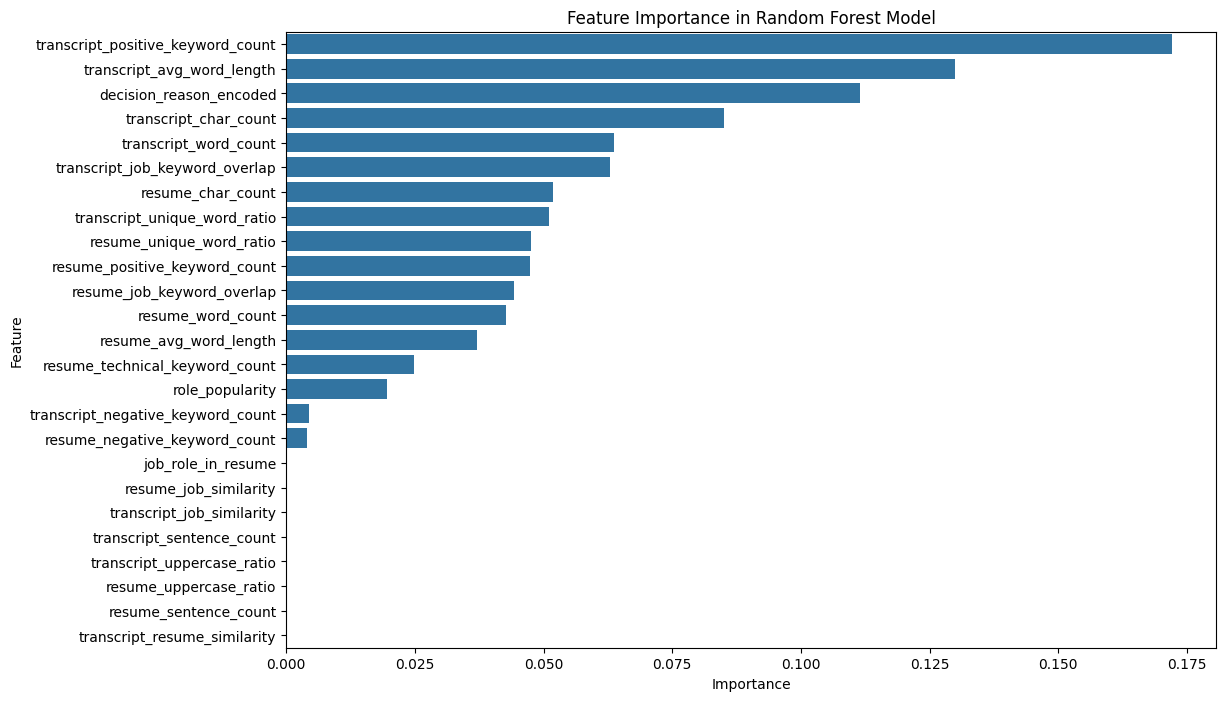

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

# Features and target variable
features = [
    'resume_word_count', 'resume_char_count', 'resume_avg_word_length', 'resume_sentence_count',
    'resume_uppercase_ratio', 'resume_technical_keyword_count', 'resume_positive_keyword_count',
    'resume_negative_keyword_count', 'resume_unique_word_ratio', 'transcript_word_count',
    'transcript_char_count', 'transcript_avg_word_length', 'transcript_sentence_count',
    'transcript_uppercase_ratio', 'transcript_positive_keyword_count', 'transcript_negative_keyword_count',
    'transcript_unique_word_ratio', 'job_role_in_resume', 'resume_job_keyword_overlap',
    'transcript_job_keyword_overlap', 'role_popularity', 'decision_reason_encoded',
    'resume_job_similarity', 'transcript_job_similarity', 'transcript_resume_similarity'
]
target = 'decision'  # Assuming 'Decision' is the column indicating acceptance/rejection

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model summary
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("\nBest Cross-Validation Score:", grid_search.best_score_)

# Predict on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nTest Set Accuracy:", accuracy)
print("Test Set ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
# Feature Importance
importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance summary
print("\nFeature Importance:\n", importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

with **selected features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

# Features and target variable
features_dt = [  'transcript_positive_keyword_count',
            'transcript_avg_word_length',
                'decision_reason_encoded',
                  'transcript_char_count',
                  'transcript_word_count',
        'transcript_job_keyword_overlap',
                      'resume_char_count',
       'transcript_unique_word_ratio',
             'resume_unique_word_ratio',
      'resume_positive_keyword_count',
          'resume_job_keyword_overlap',
                    'resume_word_count',
               'resume_avg_word_length',
       'resume_technical_keyword_count',
     'transcript_negative_keyword_count',
       'resume_negative_keyword_count'
]
target = 'decision'  # Assuming 'Decision' is the column indicating acceptance/rejection

X = df[features_dt]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model summary
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("\nBest Cross-Validation Score:", grid_search.best_score_)

# Predict on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nTest Set Accuracy:", accuracy)
print("Test Set ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Best Cross-Validation Score: 0.8496153846153846

Test Set Accuracy: 0.8538461538461538
Test Set ROC-AUC Score: 0.9394722640384015

Classification Report:
               precision    recall  f1-score   support

      reject       0.86      0.84      0.85       327
      select       0.85      0.86      0.85       323

    accuracy                           0.85       650
   macro avg       0.85      0.85      0.85       650
weighted avg       0.85      0.85      0.85       650


Confusion Matrix:
 [[276  51]
 [ 44 279]]


# gradient boosting


with **all features**

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Best Cross-Validation Score: 0.8757692307692307

Test Set Accuracy: 0.8584615384615385
Test Set ROC-AUC Score: 0.9554634021643423

Feature Importance:
                               Feature  Importance
14  transcript_positive_keyword_count    0.352618
21            decision_reason_encoded    0.275379
11         transcript_avg_word_length    0.065107
10              transcript_char_count    0.057973
16       transcript_unique_word_ratio    0.036520
8            resume_unique_word_ratio    0.032141
19     transcript_job_keyword_overlap    0.031408
1                   resume_char_count    0.025795
0                   resume_word_count    0.022252
6       resume_positive_keyword_count    0.021222
2              resume_avg_word_length    0.020456
9               transcript_word_count    0.020016
18      

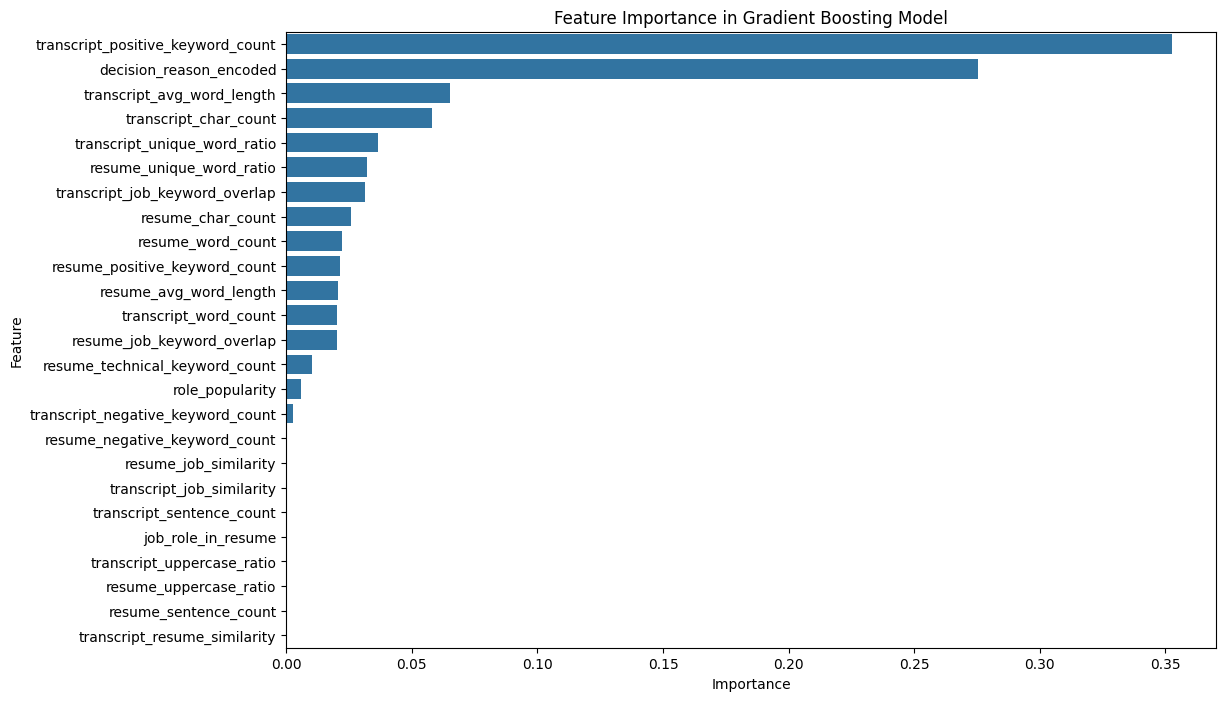

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target variable
features = [
    'resume_word_count', 'resume_char_count', 'resume_avg_word_length', 'resume_sentence_count',
    'resume_uppercase_ratio', 'resume_technical_keyword_count', 'resume_positive_keyword_count',
    'resume_negative_keyword_count', 'resume_unique_word_ratio', 'transcript_word_count',
    'transcript_char_count', 'transcript_avg_word_length', 'transcript_sentence_count',
    'transcript_uppercase_ratio', 'transcript_positive_keyword_count', 'transcript_negative_keyword_count',
    'transcript_unique_word_ratio', 'job_role_in_resume', 'resume_job_keyword_overlap',
    'transcript_job_keyword_overlap', 'role_popularity', 'decision_reason_encoded',
    'resume_job_similarity', 'transcript_job_similarity', 'transcript_resume_similarity'
]
target = 'decision'  # Replace with the correct target column if different

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model summary
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("\nBest Cross-Validation Score:", grid_search.best_score_)

# Predict on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nTest Set Accuracy:", accuracy)
print("Test Set ROC-AUC Score:", roc_auc)

# Feature Importance
importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance summary
print("\nFeature Importance:\n", importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()


with **selected features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target variable
features_gb = [
    'transcript_positive_keyword_count',
    'decision_reason_encoded',
    'transcript_avg_word_length',
    'transcript_char_count',
    'transcript_unique_word_ratio',
    'transcript_job_keyword_overlap',
    'resume_unique_word_ratio',
    'resume_char_count',
    'resume_positive_keyword_count',
    'resume_word_count'
]


target = 'decision'  # Replace with the correct target column if different

X = df[features_gb]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model summary
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("\nBest Cross-Validation Score:", grid_search.best_score_)

# Predict on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nTest Set Accuracy:", accuracy)
print("Test Set ROC-AUC Score:", roc_auc)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

Best Cross-Validation Score: 0.8800000000000001

Test Set Accuracy: 0.8584615384615385
Test Set ROC-AUC Score: 0.9558137112884748


# XG boost

In [ ]:
!pip install xgboost

In [ ]:
!pip install --upgrade xgboost

with **all features**

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:28:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

Best Cross-Validation Score: 0.8665384615384616

Test Set Accuracy: 0.8461538461538461
Test Set ROC-AUC Score: 0.9495460183107527

Feature Importance:
                               Feature  Importance
14  transcript_positive_keyword_count    0.328598
6       resume_positive_keyword_count    0.087287
11         transcript_avg_word_length    0.080518
21            decision_reason_encoded    0.073090
10              transcript_char_count    0.068665
19     transcript_job_keyword_overlap    0.056344
7       resume_negative_keyword_count    0.038682
18         resume_job_keyword_overlap    0.038021
1                   resume_char_count    0.034781
16       transcript_unique_word_ratio    0.030023
0                   resume_word_count    0.029764
8            resume_unique_word_ratio    0.028398
9               transcript_word_count    0.027752
20                    role_

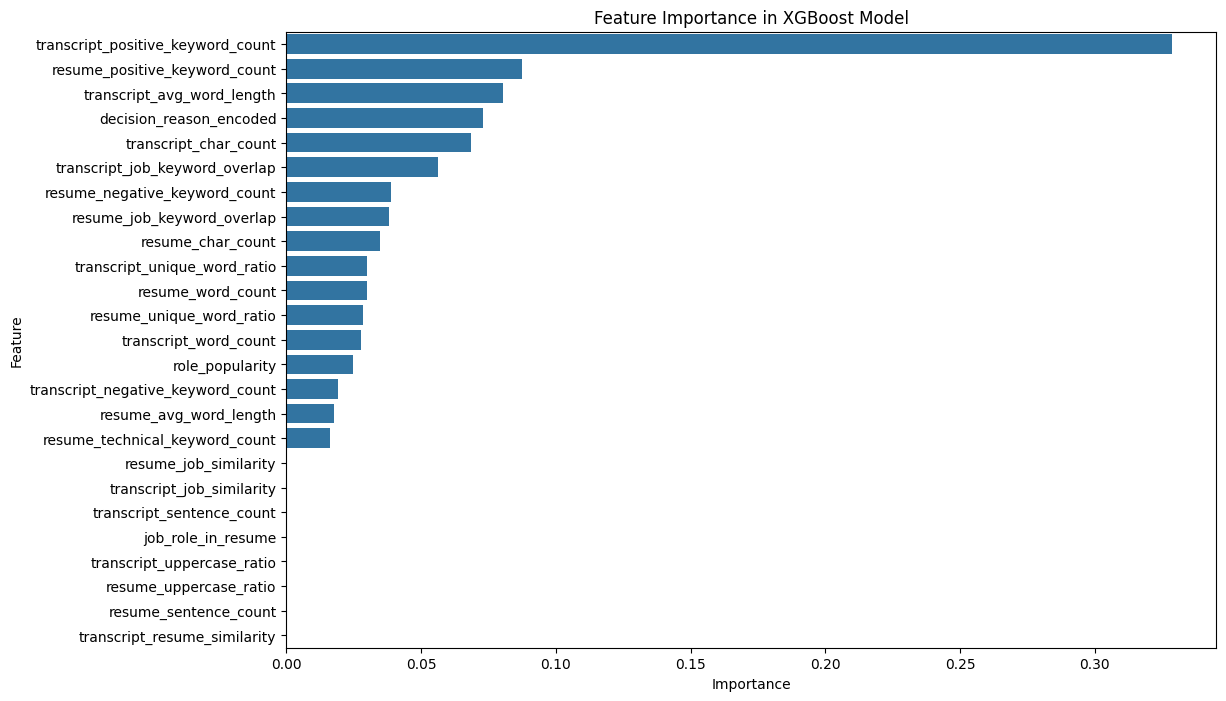

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target variable
features = [
    'resume_word_count', 'resume_char_count', 'resume_avg_word_length', 'resume_sentence_count',
    'resume_uppercase_ratio', 'resume_technical_keyword_count', 'resume_positive_keyword_count',
    'resume_negative_keyword_count', 'resume_unique_word_ratio', 'transcript_word_count',
    'transcript_char_count', 'transcript_avg_word_length', 'transcript_sentence_count',
    'transcript_uppercase_ratio', 'transcript_positive_keyword_count', 'transcript_negative_keyword_count',
    'transcript_unique_word_ratio', 'job_role_in_resume', 'resume_job_keyword_overlap',
    'transcript_job_keyword_overlap', 'role_popularity', 'decision_reason_encoded',
    'resume_job_similarity', 'transcript_job_similarity', 'transcript_resume_similarity'
]
target = 'decision'  # Replace with the correct target column if different

X = df[features]
y = df[target]

y = y.map({'reject': 0, 'select': 1})
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model summary
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("\nBest Cross-Validation Score:", grid_search.best_score_)

# Predict on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nTest Set Accuracy:", accuracy)
print("Test Set ROC-AUC Score:", roc_auc)

# Feature Importance
importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance summary
print("\nFeature Importance:\n", importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in XGBoost Model')
plt.show()


with **selected features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target variable
features = [
    'transcript_positive_keyword_count',
    'resume_positive_keyword_count',
    'transcript_avg_word_length',
    'decision_reason_encoded',
    'transcript_char_count',
    'transcript_job_keyword_overlap',
    'resume_negative_keyword_count',
    'resume_job_keyword_overlap',
    'resume_char_count',
    'transcript_unique_word_ratio'
]


target = 'decision'  # Replace with the correct target column if different

X = df[features]
y = df[target]

y = y.map({'reject': 0, 'select': 1})
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model summary
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("\nBest Cross-Validation Score:", grid_search.best_score_)

# Predict on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nTest Set Accuracy:", accuracy)
print("Test Set ROC-AUC Score:", roc_auc)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:33:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}

Best Cross-Validation Score: 0.8776923076923075

Test Set Accuracy: 0.86
Test Set ROC-AUC Score: 0.9566279433067288


# logistic regression


with **all features**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y)
X = df[engineered_features]
y = df['decision']  # Assuming 'Decision' is your target variable column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'] # Solvers that support L1 regularization
}

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_logreg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_logreg.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Model summary (coefficients and intercept)
print("Coefficients:", best_logreg.coef_)
print("Intercept:", best_logreg.intercept_)

# Feature Importance
feature_importance = pd.DataFrame({'Feature': engineered_features, 'Importance': abs(best_logreg.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7907692307692308
              precision    recall  f1-score   support

      reject       0.77      0.83      0.80       327
      select       0.81      0.75      0.78       323

    accuracy                           0.79       650
   macro avg       0.79      0.79      0.79       650
weighted avg       0.79      0.79      0.79       650

Coefficients: [[ 3.67058968e-02 -4.87522468e-03  6.87534524e-01  0.00000000e+00
   0.00000000e+00 -5.98262300e-03  3.32511818e-01 -1.44240092e+00
   6.21435275e+00 -9.58837444e-02  1.39340535e-02 -4.81011696e+00
   0.00000000e+00  0.00000000e+00  8.68056522e-01 -1.76035890e-02
   9.60068356e+00  2.11783855e+00 -9.68447969e-02  1.21537377e-01
   1.40785518e-03 -1.19642853e-03  2.90406609e+00  2.92361995e+00
   2.82537641e+00]]
Intercept: [2.68473424]

Feature Importance:
                               Feature  Importance
16       transcript_unique_word_ratio    9.60

with **selected features**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

features = [
    'transcript_unique_word_ratio',
    'resume_unique_word_ratio',
    'transcript_avg_word_length',
    'transcript_job_similarity',
    'transcript_resume_similarity',
    'resume_job_similarity',
    'job_role_in_resume',
    'resume_negative_keyword_count',
    'transcript_positive_keyword_count',
    'resume_avg_word_length'
]

# Define features (X) and target (y)
X = df[features]
y = df['decision']  # Assuming 'Decision' is your target variable column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'] # Solvers that support L1 regularization
}

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_logreg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_logreg.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Model summary (coefficients and intercept)
print("Coefficients:", best_logreg.coef_)
print("Intercept:", best_logreg.intercept_)

# Feature Importance
feature_importance = pd.DataFrame({'Feature':features, 'Importance': abs(best_logreg.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.7676923076923077
              precision    recall  f1-score   support

      reject       0.74      0.83      0.78       327
      select       0.80      0.71      0.75       323

    accuracy                           0.77       650
   macro avg       0.77      0.77      0.77       650
weighted avg       0.77      0.77      0.77       650

Coefficients: [[ 0.47494534  0.97470521  1.07489459 -0.02226475 -0.02226475 -0.02226475
   0.19228908 -0.86894745  1.22194373 -0.05492258]]
Intercept: [-8.25648442]

Feature Importance:
                              Feature  Importance
8  transcript_positive_keyword_count    1.221944
2         transcript_avg_word_length    1.074895
1           resume_unique_word_ratio    0.974705
7      resume_negative_keyword_count    0.868947
0       transcript_unique_word_ratio    0.474945
6                 job_role_in_resume    0.192289
9             resume_avg_word_length    0.0549